In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Seting parameters
lambda_B = 2.0  # Rate parameter for Bayesienine
mu_S = 4.0      # Mean for Statistiene
sigma_S = 0.8   # Standard deviation for Statistiene

# Creating range of threshold values
g_T_values = np.linspace(0, 8, 1000)

# Calculating misclassification probabilities
p_B_S = np.exp(-lambda_B * g_T_values)  # Bayesienine misclassified as Statistiene
p_S_B = norm.cdf((g_T_values - mu_S) / sigma_S)  # Statistiene misclassified as Bayesienine

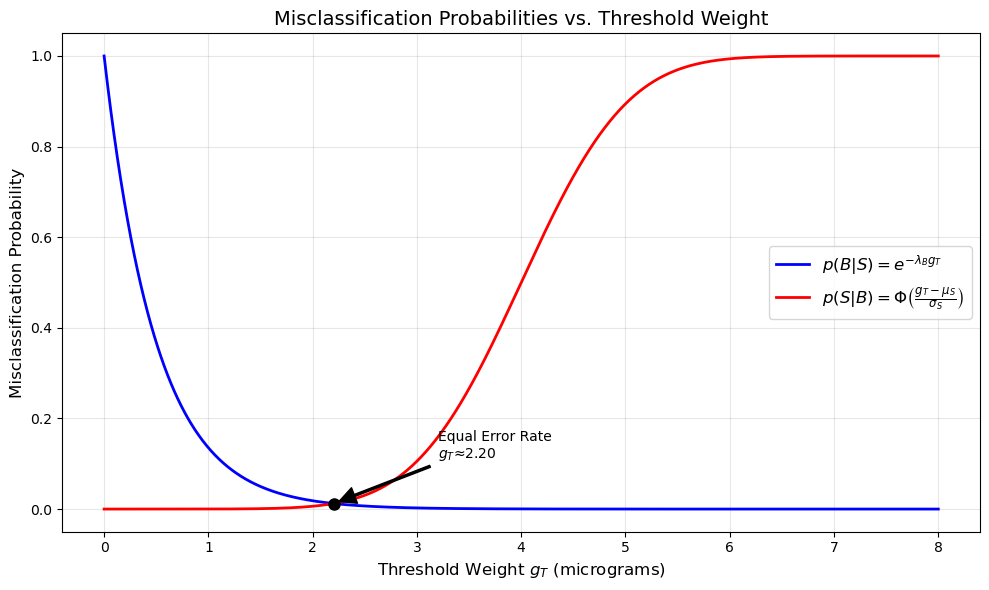

In [3]:
# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(g_T_values, p_B_S, 'b-', linewidth=2, label=r'$p(B|S) = e^{-\lambda_B g_T}$')
plt.plot(g_T_values, p_S_B, 'r-', linewidth=2, label=r'$p(S|B) = \Phi\left(\frac{g_T - \mu_S}{\sigma_S}\right)$')

# Adding labels and title
plt.xlabel('Threshold Weight $g_T$ (micrograms)', fontsize=12)
plt.ylabel('Misclassification Probability', fontsize=12)
plt.title('Misclassification Probabilities vs. Threshold Weight', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Showing the point where the errors are equal
idx = np.argmin(np.abs(p_B_S - p_S_B))
equal_error_g_T = g_T_values[idx]
equal_error_prob = p_B_S[idx]
plt.plot(equal_error_g_T, equal_error_prob, 'ko', markersize=8)
plt.annotate(f'Equal Error Rate\n$g_T ≈ {equal_error_g_T:.2f}$', 
             xy=(equal_error_g_T, equal_error_prob),
             xytext=(equal_error_g_T + 1, equal_error_prob + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.tight_layout()
plt.savefig('misclassification_errors.png', dpi=300)
plt.show()